In [1]:
import os
import sys

# Add root folder of the project in sys.path
module_path = os.path.abspath(os.path.join('..'))  # Up on one level higher 
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt

from math import *
from collections import defaultdict
from plot_results import PrepareData, Calculations, PlotResults

In [2]:
# Create a list with of amounts of data for all experiments
data_amounts = [0, 1000, 2000, 3000, 4000, 5000, 10000, 15000, 20000, 30000, 39644]

# Create class instances
prepData = PrepareData()
calc = Calculations()
plot = PlotResults()

## Experiment 7 - MLP, 4 hidden layers

In [5]:
# Define global variabels fror the first experiment
base_path_exp7 = "/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/news_dataset/news_output/exp_7/weights_graphs_mlp"
layers_num_exp7 = 4

In [6]:
barcode_layers_exp7 = prepData.load_barcode_data(amounts=data_amounts, base_path=base_path_exp7)

### Mean lifetime

/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/plot_results.py:180: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


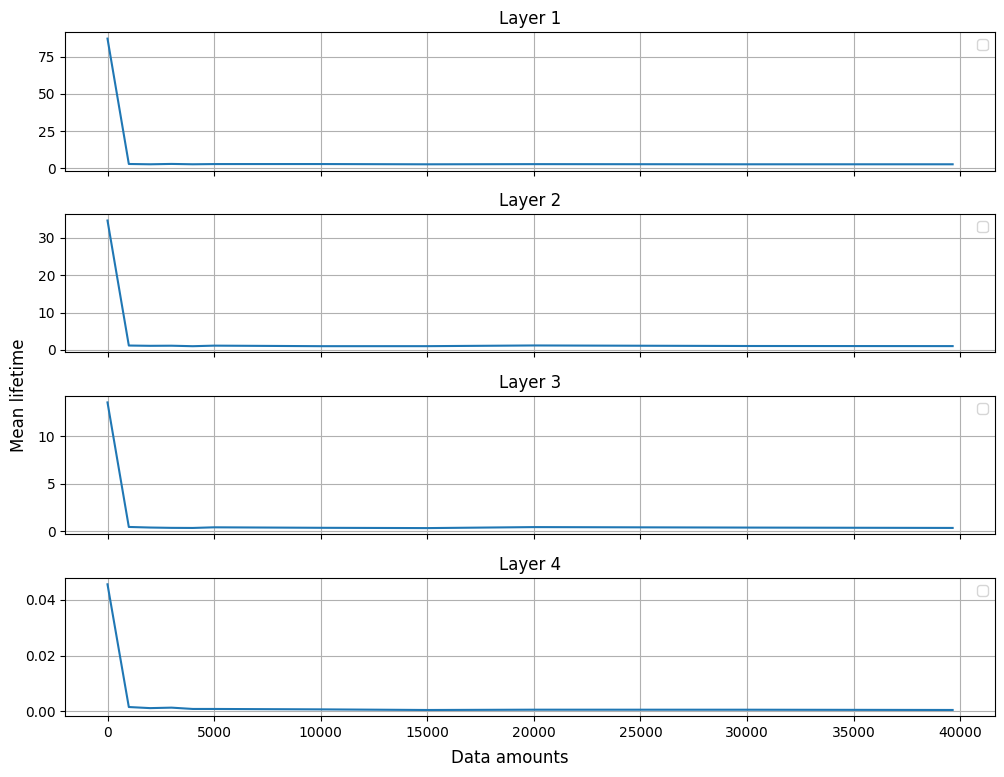

In [7]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_homologies_ml_exp7 = list()

# Fill in created list
for i in range(layers_num_exp7):
    h_layer = list()
    for batch in data_amounts:
        h_layer.append(calc.calculate_homology_mean_lifetime(barcode_layers_exp7[batch][i]))
    layers_homologies_ml_exp7.append(h_layer)

plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_homologies_ml_exp7, label='Mean lifetime', layers_num=layers_num_exp7)

### Norm persist entropy

/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/plot_results.py:180: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


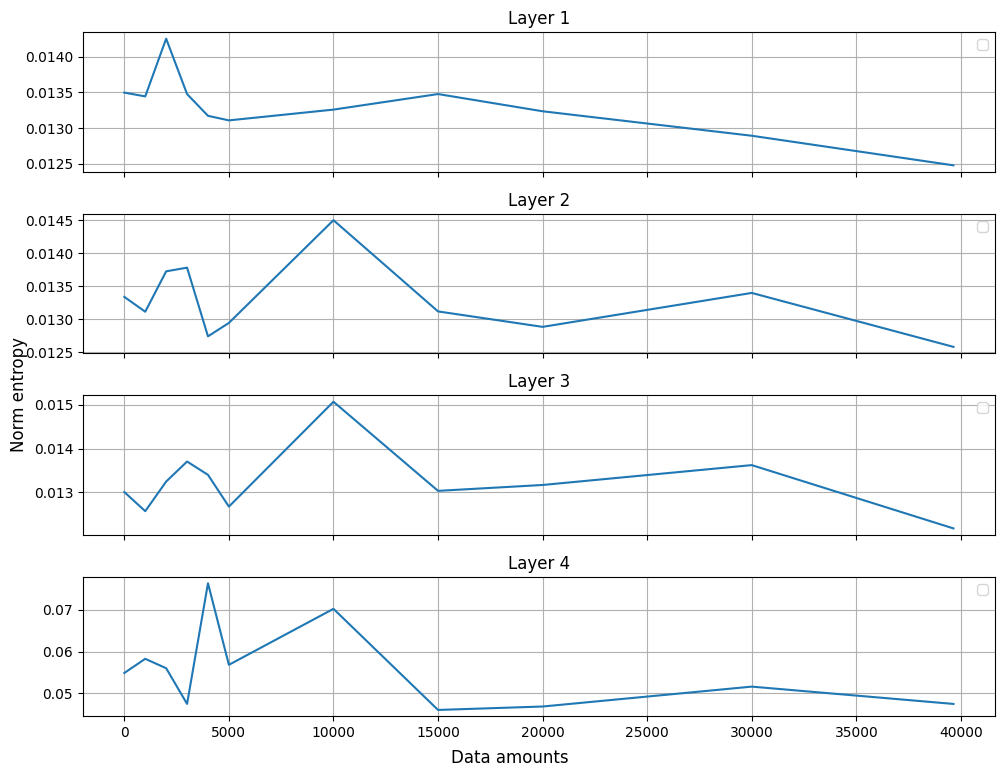

In [8]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_norm_entropy_exp7 = list()

# Fill in created list
for q in range(layers_num_exp7):
    layer_norm_ent = list()
    for batch in data_amounts:
        layer_norm_ent.append(calc.calculate_norm_persist_entropy(barcode_layers_exp7[batch][q]))
    layers_norm_entropy_exp7.append(layer_norm_ent)

plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_norm_entropy_exp7, label='Norm entropy', layers_num=layers_num_exp7)